# Visualisation 1 (Week 3) – Deaths code + Graph


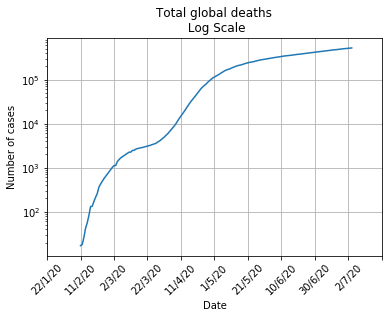

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Read in from Raw url , updates everyday.
death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
#Create a dataframe with confirmed cases and turns the date columsn into date objects instead of strings
df = pd.read_csv(death, parse_dates=True)
#Drop the province/state column as it is redundent for our objective
df.drop(columns=['Province/State','Lat','Long','Country/Region'], inplace = True )


death_graph = df.sum().plot()
death_graph.set_title('Total global deaths\n Log Scale')
death_graph.set_xlabel('Date')
death_graph.set_ylabel('Number of cases')
death_graph.set_yscale('log')
plt.xticks([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.], 
           ['22/1/20', '11/2/20', '2/3/20', '22/3/20', '11/4/20', '1/5/20', '21/5/20', '10/6/20', '30/6/20', '2/7/20'], 
           rotation=45)
plt.grid(True)
death_graph

###  3 day average 

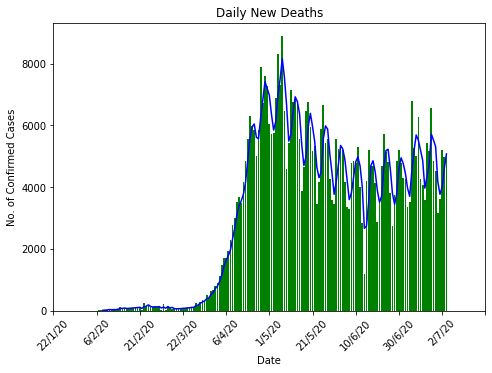

In [4]:
import matplotlib.ticker as ticker
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


x = (list(df.columns))
y = df.sum().diff()
z = df.sum().diff().rolling(3).mean()
tick_spacing = 15

ax.bar(x, y, color ='green')
ax.plot(x, z, color='blue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Date')
plt.ylabel('No. of Confirmed Cases')
plt.title('Daily New Deaths')
plt.xticks([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.], 
           ['22/1/20', '6/2/20', '21/2/20', '22/3/20', '6/4/20', '1/5/20', '21/5/20', '10/6/20', '30/6/20', '2/7/20'], 
           rotation=45)
plt.show()